In [2]:
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

import pandas as pd
import un_transforms as tr

#importing the dataset
mixed = pd.read_csv("./data/sup_final_copy2.csv", sep=",", parse_dates=[0,3,5,13,14])
#['origin_date', 'created_at', 'customer_created_on', 'customer_first_transaction', 'transaction_date']

In [3]:
mixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10130 entries, 0 to 10129
Data columns (total 16 columns):
origin_date                   10130 non-null datetime64[ns]
business_name                 10130 non-null object
business_type                 10130 non-null object
created_at                    10130 non-null datetime64[ns]
transaction                   10130 non-null int64
transaction_date              10130 non-null datetime64[ns]
fingerprint                   10130 non-null object
amount                        10130 non-null int64
currency                      10130 non-null object
channel                       10130 non-null object
bin                           10130 non-null object
country_name                  10130 non-null object
bank                          10130 non-null object
customer_created_on           10130 non-null datetime64[ns]
customer_first_transaction    10130 non-null datetime64[ns]
category                      10130 non-null object
dtypes: datetime64[ns

In [4]:
mixed['category'].value_counts()

legit    5133
fraud    4997
Name: category, dtype: int64

In [5]:
mixed.head()

,origin_date,business_name,business_type,created_at,transaction,transaction_date,fingerprint,amount,currency,channel,bin,country_name,bank,customer_created_on,customer_first_transaction,category
0,2017-09-11 12:54:34,Golad Telecoms,registered,2017-06-13 14:51:26,9498016,2017-12-26 03:08:12,08b234202be8d26a55d41b592d64e31ea9b36ce1898588...,300000,NGN,card,539983,Nigeria,Guaranty Trust Bank,2017-11-30 16:44:45,2017-12-01 09:31:31,fraud
1,2017-09-11 12:54:34,Golad Telecoms,registered,2017-06-13 14:51:26,9546662,2017-12-26 14:27:21,08b234202be8d26a55d41b592d64e31ea9b36ce1898588...,300000,NGN,card,539983,Nigeria,Guaranty Trust Bank,2017-11-30 16:44:45,2017-12-01 09:31:31,fraud
2,2017-08-24 10:22:07,Over The Top Entertainment Ltd.,registered,2017-05-03 11:34:26,16412639,2018-02-26 11:28:13,8a6737e520c5333b4a925850f0cbe659e09db980f59e49...,4500000,NGN,bank,003XXX,Nigeria,Access Bank (Diamond),2018-02-26 11:25:15,2018-02-26 11:26:22,fraud
3,2016-07-01 15:11:03,Paylater,registered,2016-05-23 14:14:39,18205642,2018-03-09 18:03:26,1c0d35f2260873fa5d0d50726d918521d6418a97b67400...,505000,NGN,bank,008XXX,Nigeria,Access Bank (Diamond),2018-03-06 18:08:45,2018-03-09 18:03:26,fraud
4,2016-07-01 15:11:03,Paylater,registered,2016-05-23 14:14:39,18219562,2018-03-09 19:15:20,1c0d35f2260873fa5d0d50726d918521d6418a97b67400...,2505000,NGN,bank,008XXX,Nigeria,Access Bank (Diamond),2018-03-06 18:08:45,2018-03-09 18:03:26,fraud


In [6]:
mixed['bank'].value_counts()

Guaranty Trust Bank         2314
Access Bank (Diamond)       1731
Access Bank                 1481
Zenith Bank                  964
United Bank for Africa       859
First Bank of Nigeria        683
Sterling Bank                621
First City Monument Bank     290
Polaris Bank                 276
Fidelity Bank                239
Ecobank Nigeria              164
Union Bank of Nigeria        120
Stanbic IBTC Bank            115
International                 82
Keystone Bank                 79
Wema Bank                     36
Heritage Bank                 28
Unity Bank                    16
Standard Chartered Bank       16
ALAT by WEMA                  11
Jaiz Bank                      3
Visa QR                        1
Providus Bank                  1
Name: bank, dtype: int64

In [7]:
#importing the attribute transformer class
import attributeTransformer as attrTr
from sklearn import metrics

In [8]:
trFC = attrTr.TransformFeatureColumns(mixed)
trFC.splitData(0.2)
XTrain, YTrain = trFC.spoolTrainingData()
XTest, YTest = trFC.spoolTestData()

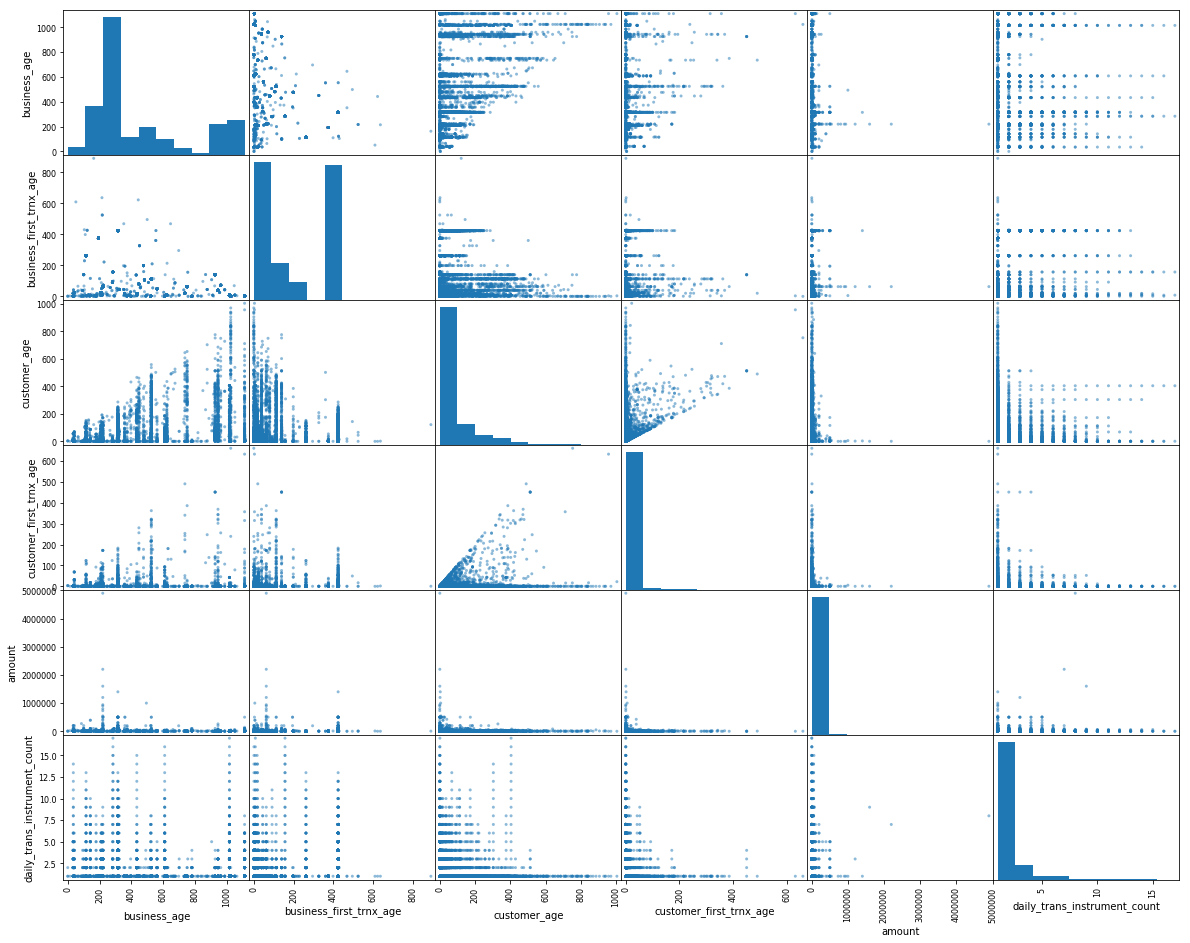

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["business_age", "business_first_trnx_age", "customer_age", "customer_first_trnx_age", 
              "amount", "daily_trans_instrument_count"]
scatter_matrix(XTrain[attributes], figsize=(20, 16))
plt.show()

In [10]:
#print(np.sum(pca.explained_variance_ratio_))

In [11]:
#print(pca.singular_values_)

In [12]:
target_names = ['legit', 'fraud']

In [13]:
#Tree Classifier - Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [14]:
XTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8075 entries, 0 to 8074
Data columns (total 35 columns):
business_age                    -8075 non-null float64
business_first_trnx_age         -8075 non-null float64
is_registered                   -8075 non-null float64
is_starter                      -8075 non-null float64
customer_age                    -8075 non-null float64
customer_first_trnx_age         -8075 non-null float64
daily_trans_instrument_count    -8075 non-null float64
is_local_instrument             -8075 non-null float64
paid_with_card                  -8075 non-null float64
paid_with_bank                  -8075 non-null float64
paid_with_other                 -8075 non-null float64
amount                          -8075 non-null float64
x0_NGN                          -8075 non-null Sparse[float64, 0]
x0_USD                          -8075 non-null Sparse[float64, 0]
x0_ALAT by WEMA                 -8075 non-null Sparse[float64, 0]
x0_Access Bank                  -80

In [15]:
import random

validationIndices = []
validationSetLength = int(0.2 * len(XTrain))
for x in range(validationSetLength):
    validationIndices = np.append(validationIndices, int(random.randint(0, len(XTrain) - 1)))

In [16]:
XVal = XTrain.iloc[validationIndices]
YVal = (pd.DataFrame(YTrain)).iloc[validationIndices]

In [17]:
dCVScores = []
dCVStds = []
dClfCV = DecisionTreeClassifier(criterion='entropy')
for i in range(10):
    scores = cross_val_score(dClfCV, XVal.values, YVal.values.ravel(), cv=10)
    dCVScores = np.append(dCVScores, scores.mean())
    dCVStds = np.append(dCVStds, scores.std())
    
tr.crossValScores(dCVScores, dCVStds)

Scores 			 [0.86751984 0.86071045 0.86194507 0.86998121 0.86628523 0.86442964
 0.85947588 0.8705985  0.86998898 0.86626984]
Mean 			 0.8657204633463691
Standard Deviation: 	 0.01999302772278897


In [18]:
dClf = DecisionTreeClassifier(criterion='entropy')
dClf.fit(XTrain, YTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
dClfPred = dClf.predict(XTest)
print("Decision Tree Accuracy : ", metrics.accuracy_score(YTest, dClfPred))

Decision Tree Accuracy :  0.9031630170316302


In [20]:
cMatrix = metrics.confusion_matrix(YTest, dClfPred).ravel()
print("Decision Tree Confusion Matrix : \n{TP : %d, FN : %d,\n FP : %d, TN : %d}" % (cMatrix[3], cMatrix[2], cMatrix[1], cMatrix[0]))

Decision Tree Confusion Matrix : 
{TP : 967, FN : 67,
 FP : 132, TN : 889}


In [21]:
print("Decision Tree Classification Report : \n", metrics.classification_report(YTest, dClfPred, target_names=target_names))

Decision Tree Classification Report : 
               precision    recall  f1-score   support

       legit       0.93      0.87      0.90      1021
       fraud       0.88      0.94      0.91      1034

   micro avg       0.90      0.90      0.90      2055
   macro avg       0.90      0.90      0.90      2055
weighted avg       0.90      0.90      0.90      2055



In [22]:
dfpr, dtpr, dthresh = metrics.roc_curve(YTest, dClfPred)
dauc = metrics.roc_auc_score(YTest, dClfPred)

In [23]:
from sklearn.tree import export_graphviz

export_graphviz(
dClf,
out_file="./data/tree.dot",
feature_names=XTrain.columns,
class_names=['legit','fraud'],
rounded=True,
filled=True
)

In [24]:
#Ensemble Based Classifier - Random Forests
from sklearn.ensemble import RandomForestClassifier

In [25]:
rClfCVScores = []
rClfCVStds = []
rClfCV = RandomForestClassifier()
for i in range(10):
    scores = cross_val_score(rClfCV, XVal.values, YVal.values.ravel(), cv=10)
    rClfCVScores = np.append(rClfCVScores, scores.mean())
    rClfCVStds = np.append(rClfCVStds, scores.std())
    
tr.crossValScores(rClfCVScores, rClfCVStds)

Scores 			 [0.91273953 0.913326   0.90343786 0.9102588  0.90713001 0.91270483
 0.89908222 0.90964156 0.89971489 0.89844567]
Mean 			 0.9066481385629936
Standard Deviation: 	 0.01835858275462843


In [26]:
rClf = RandomForestClassifier()
rClf.fit(XTrain, YTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
rClfPred = rClf.predict(XTest)
print("Random Forest Classifier Accuracy : ", metrics.accuracy_score(YTest, rClfPred))

Random Forest Classifier Accuracy :  0.9313868613138686


In [28]:
print("Random Forest Classifier Report : \n", metrics.classification_report(YTest, rClfPred, target_names=target_names))

Random Forest Classifier Report : 
               precision    recall  f1-score   support

       legit       0.93      0.93      0.93      1021
       fraud       0.93      0.93      0.93      1034

   micro avg       0.93      0.93      0.93      2055
   macro avg       0.93      0.93      0.93      2055
weighted avg       0.93      0.93      0.93      2055



In [29]:
rMatrix = metrics.confusion_matrix(YTest, rClfPred).ravel()
print("Random Forest Classifier Confusion Matrix : \n{TP : %d, FN : %d,\n FP : %d, TN : %d}" % (rMatrix[3], rMatrix[2], rMatrix[1], rMatrix[0]))

Random Forest Classifier Confusion Matrix : 
{TP : 963, FN : 71,
 FP : 70, TN : 951}


In [30]:
rfpr, rtpr, rthresh = metrics.roc_curve(YTest, rClfPred)
rauc = metrics.roc_auc_score(YTest, rClfPred)

In [31]:
print("Important Features : \n")
for col, score in zip(XTrain.columns, rClf.feature_importances_) :
    print(col, score)

Important Features : 

business_age 0.07317504438581637
business_first_trnx_age 0.07926348511541371
is_registered 0.0008976952927813361
is_starter 0.0007203757342455255
customer_age 0.11319948378693707
customer_first_trnx_age 0.09172604163482503
daily_trans_instrument_count 0.14253386760724698
is_local_instrument 0.001833579658930749
paid_with_card 0.10803121215837
paid_with_bank 0.0861737774598555
paid_with_other 0.0009725958347897755
amount 0.2139612576667249
x0_NGN 0.0
x0_USD 0.0
x0_ALAT by WEMA 0.0017320887173907147
x0_Access Bank 0.008157554458212389
x0_Access Bank (Diamond) 0.011576705542997778
x0_Ecobank Nigeria 0.0025870965268869864
x0_Fidelity Bank 0.0020064319504877887
x0_First Bank of Nigeria 0.013064806348458016
x0_First City Monument Bank 0.0033583787786894206
x0_Guaranty Trust Bank 0.010809323377823657
x0_Heritage Bank 0.0006743186097085621
x0_International 0.0012001096925403148
x0_Jaiz Bank 5.90006391113132e-06
x0_Keystone Bank 0.002948301687723185
x0_Polaris Bank 0.0037

In [32]:
XTrain = trFC.scaleData(XTrain, True)
XTest = trFC.scaleData(XTest)

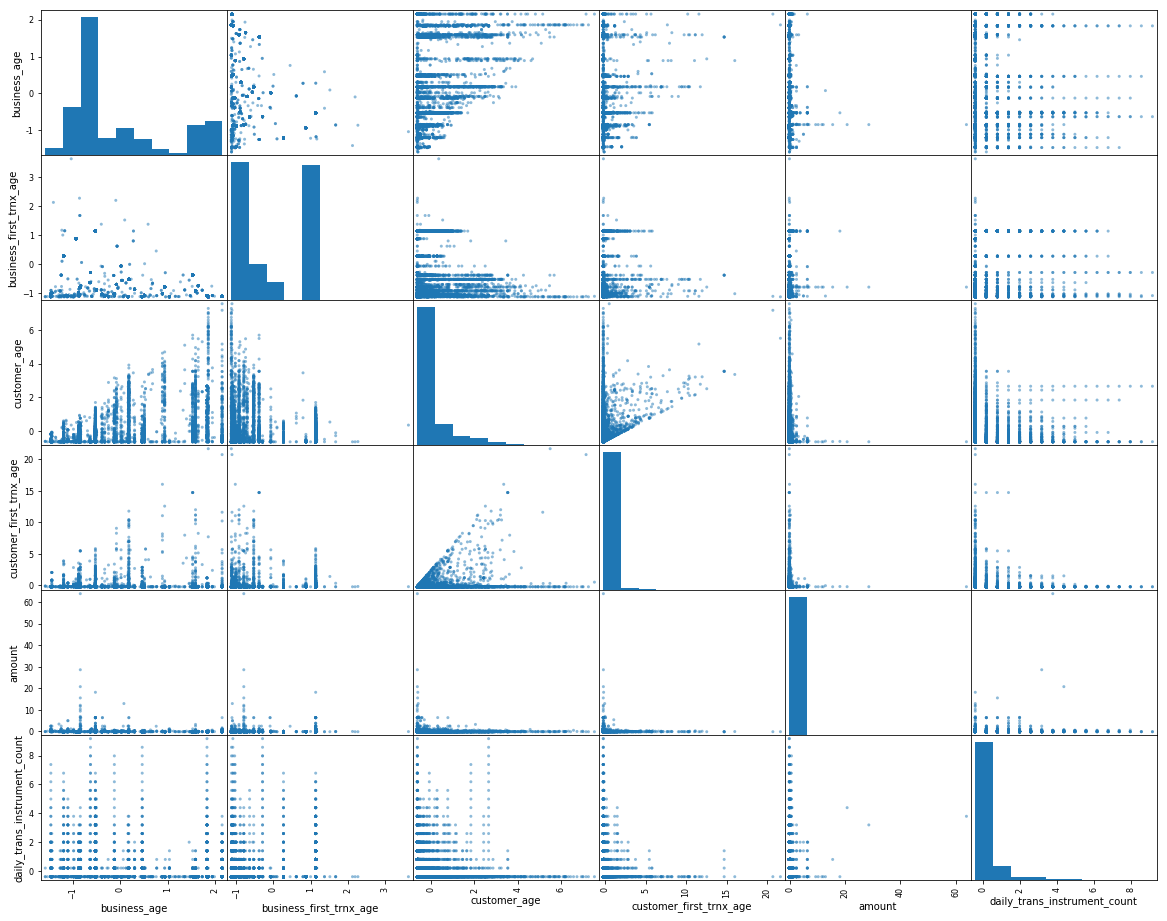

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["business_age", "business_first_trnx_age", "customer_age", "customer_first_trnx_age", 
              "amount", "daily_trans_instrument_count"]
scatter_matrix(XTrain[attributes], figsize=(20, 16))
plt.show()

In [34]:
#reducing the data
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95,svd_solver='full')
XTrain = pca.fit_transform(XTrain)
XTest = pca.transform(XTest)

In [35]:
pca.explained_variance_ratio_

array([0.08601979, 0.06691201, 0.05847732, 0.05077187, 0.04446255,
       0.03675717, 0.03425179, 0.03290082, 0.03197484, 0.03136907,
       0.03062591, 0.02991834, 0.02976021, 0.02928651, 0.02914879,
       0.028964  , 0.02888584, 0.02876966, 0.02868728, 0.02867971,
       0.0285961 , 0.02858447, 0.0283842 , 0.0283243 , 0.02731722,
       0.0265972 , 0.02281491])

In [36]:
XVal = (pd.DataFrame(XTrain)).iloc[validationIndices]
YVal = (pd.DataFrame(YTrain)).iloc[validationIndices]

In [37]:
#Linear Based Classifier - Support Vector Machines
from sklearn.svm import SVC

In [38]:
svcCVScores = []
svcCVStds = []
svcCV = SVC(kernel='linear', gamma='scale', C=0.5)
for i in range(10):
    scores = cross_val_score(svcCV, XVal, YVal, cv=10)
    svcCVScores = np.append(svcCVScores, scores.mean())
    svcCVStds = np.append(svcCVStds, scores.std())
    
tr.crossValScores(svcCVScores, svcCVStds)

Scores 			 [0.85135486 0.85135486 0.85135486 0.85135486 0.85135486 0.85135486
 0.85135486 0.85135486 0.85135486 0.85135486]
Mean 			 0.8513548615903689
Standard Deviation: 	 0.021066662241641214


In [39]:
svc = SVC(kernel='linear', gamma='scale', C=0.5)
svc.fit(XTrain, YTrain)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
svcPred = svc.predict(XTest)
print("SVM Accuracy : ", metrics.accuracy_score(YTest, svcPred))

SVM Accuracy :  0.8802919708029197


In [41]:
print("SVM Classification Report : \n", metrics.classification_report(YTest, svcPred, target_names=target_names))

SVM Classification Report : 
               precision    recall  f1-score   support

       legit       0.88      0.88      0.88      1021
       fraud       0.88      0.88      0.88      1034

   micro avg       0.88      0.88      0.88      2055
   macro avg       0.88      0.88      0.88      2055
weighted avg       0.88      0.88      0.88      2055



In [42]:
sMatrix = metrics.confusion_matrix(YTest, svcPred).ravel()
print("SVC Confusion Matrix : \n{TP : %d, FN : %d,\n FP : %d, TN : %d}" % (sMatrix[3], sMatrix[2], sMatrix[1], sMatrix[0]))

SVC Confusion Matrix : 
{TP : 915, FN : 119,
 FP : 127, TN : 894}


In [43]:
sfpr, stpr, sthresh = metrics.roc_curve(YTest, svcPred)
sauc = metrics.roc_auc_score(YTest, svcPred)

In [44]:
#Distance Based Classifier - K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knnCVScores = []
knnCVStds = []
knnCV = KNeighborsClassifier(n_neighbors=3, weights='distance')
for i in range(10):
    scores = cross_val_score(knnCV, XVal, YVal, cv=10)
    knnCVScores = np.append(knnCVScores, scores.mean())
    knnCVStds = np.append(knnCVStds, scores.std())
    
tr.crossValScores(knnCVScores, knnCVStds)

Scores 			 [0.88238086 0.88238086 0.88238086 0.88238086 0.88238086 0.88238086
 0.88238086 0.88238086 0.88238086 0.88238086]
Mean 			 0.8823808565294072
Standard Deviation: 	 0.02071132570068706


In [46]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')#n_neighbors=3 then 1 #w distance then uniform
knn.fit(XTrain, YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [47]:
knnPred = knn.predict(XTest)
print("KNN Accuracy : ", metrics.accuracy_score(YTest, knnPred))

KNN Accuracy :  0.9051094890510949


In [48]:
print("KNN Classification Report : \n", metrics.classification_report(YTest, knnPred, target_names=target_names))

KNN Classification Report : 
               precision    recall  f1-score   support

       legit       0.93      0.88      0.90      1021
       fraud       0.89      0.93      0.91      1034

   micro avg       0.91      0.91      0.91      2055
   macro avg       0.91      0.90      0.91      2055
weighted avg       0.91      0.91      0.91      2055



In [49]:
kMatrix = metrics.confusion_matrix(YTest, knnPred).ravel()
print("KNN Confusion Matrix : \n{TP : %d, FN : %d,\n FP : %d, TN : %d}" % (kMatrix[3], kMatrix[2], kMatrix[1], kMatrix[0]))

KNN Confusion Matrix : 
{TP : 964, FN : 70,
 FP : 125, TN : 896}


In [50]:
kfpr, ktpr, kthresh = metrics.roc_curve(YTest, knnPred)
kauc = metrics.roc_auc_score(YTest, knnPred)

In [55]:
from scipy.stats import wilcoxon

alpha = 0.05

statDTRL, pDTRL = wilcoxon(dCVScores, rClfCVScores)
print('Statistics=%.3f, p=%.3f' % (statDTRL, pDTRL))

if pDTRL > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

statDTSVM, pDTSVM = wilcoxon(dCVScores, svcCVScores)
print('Statistics=%.3f, p=%.3f' % (statDTSVM, pDTSVM))
if pDTSVM > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

statDTKNN, pDTKNN = wilcoxon(dCVScores, knnCVScores)
print('Statistics=%.3f, p=%.3f' % (statDTKNN, pDTKNN))
if pDTKNN > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

statRLSVM, pRLSVM = wilcoxon(rClfCVScores, svcCVScores)
print('Statistics=%.3f, p=%.3f' % (statRLSVM, pRLSVM))
if pRLSVM > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

statRLKNN, pRLKNN = wilcoxon(dCVScores, knnCVScores)
print('Statistics=%.3f, p=%.3f' % (statRLKNN, pRLKNN))
if pRLKNN > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

statSVMKNN, pSVMKNN = wilcoxon(rClfCVScores, svcCVScores)
print('Statistics=%.3f, p=%.3f' % (statSVMKNN, pSVMKNN))
if pSVMKNN > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=0.000, p=0.005
Different distribution (reject H0)
Statistics=0.000, p=0.005
Different distribution (reject H0)
Statistics=0.000, p=0.005
Different distribution (reject H0)
Statistics=0.000, p=0.005
Different distribution (reject H0)
Statistics=0.000, p=0.005
Different distribution (reject H0)
Statistics=0.000, p=0.005
Different distribution (reject H0)


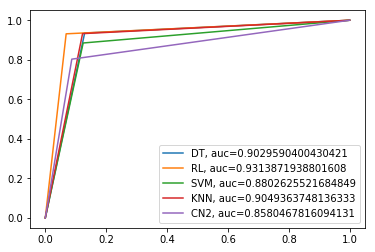

In [54]:
plt.figure(0).clf()
plt.plot(dfpr, dtpr, label="DT, auc="+str(dauc))
plt.plot(rfpr, rtpr, label="RL, auc="+str(rauc))
plt.plot(sfpr, stpr, label="SVM, auc="+str(sauc))
plt.plot(kfpr, ktpr, label="KNN, auc="+str(kauc))
plt.plot([0.,0.08704062,1.], [0.,0.80313418,1.], label="CN2, auc=0.8580467816094131")

plt.legend(loc=0)